# Image processing

## 2nd Assignment - Shahid Beheshti University 

### Outline

- [Question 1](#0)
- [Question 2](#1)

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import math

<a name="0"></a>
## Question 1
Image Cartoonifier

In [5]:
# Read the input image
img = cv2.imread('images/img2.jpg')

In [6]:
print(img)

[[[ 89 108 141]
  [ 89 108 141]
  [ 89 108 141]
  ...
  [ 72  87 119]
  [ 71  86 119]
  [ 71  86 119]]

 [[ 90 109 142]
  [ 90 109 142]
  [ 90 109 142]
  ...
  [ 72  87 119]
  [ 71  86 119]
  [ 71  86 119]]

 [[ 93 110 143]
  [ 93 110 143]
  [ 93 110 143]
  ...
  [ 72  87 119]
  [ 71  86 119]
  [ 71  86 119]]

 ...

 [[ 82  97 130]
  [ 82  97 130]
  [ 83  98 131]
  ...
  [ 50  57  77]
  [ 50  57  77]
  [ 50  57  77]]

 [[ 82  97 129]
  [ 83  98 130]
  [ 83  98 130]
  ...
  [ 49  56  76]
  [ 49  56  76]
  [ 49  56  76]]

 [[ 83  98 130]
  [ 83  98 130]
  [ 84  99 131]
  ...
  [ 48  55  75]
  [ 48  55  75]
  [ 48  55  75]]]


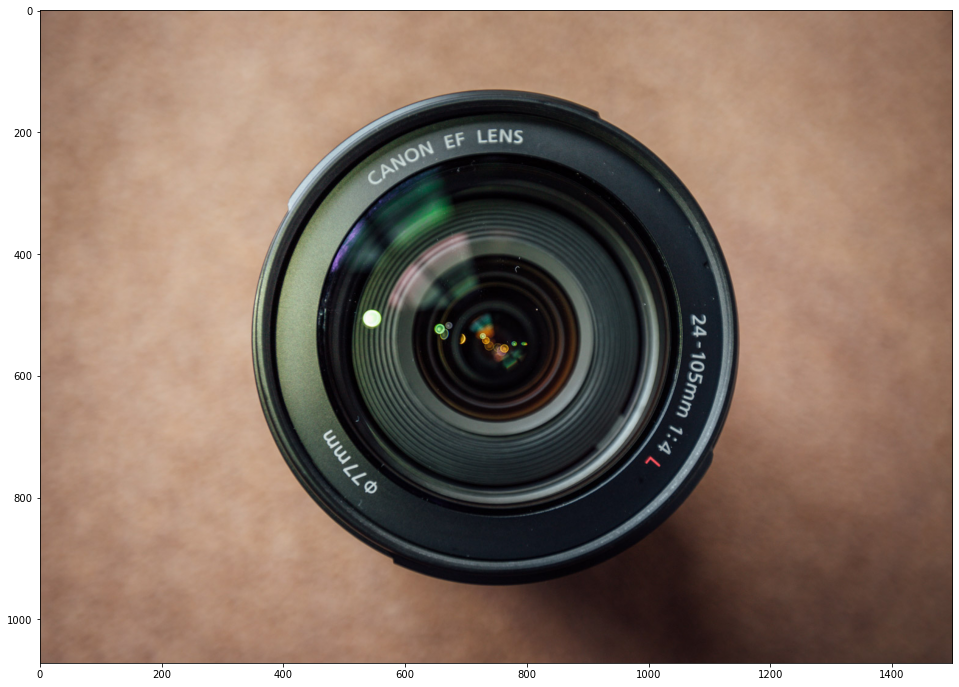

In [7]:
figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
#convert to gray scale
grayScaleImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

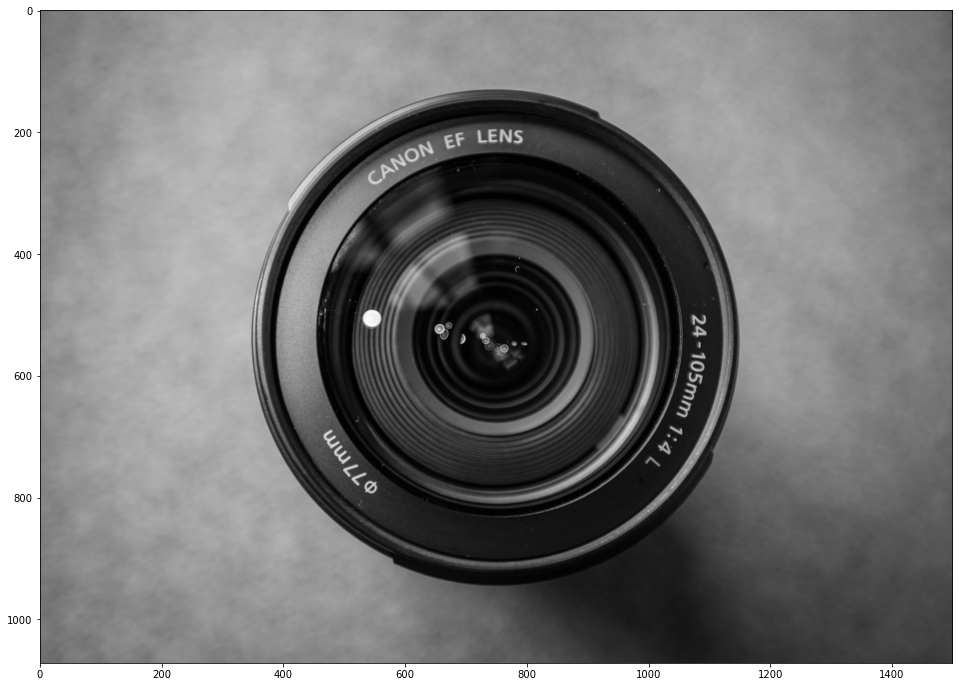

In [9]:
figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(grayScaleImage, cv2.COLOR_BGR2RGB))

In [11]:
#median Blur to get smooth image
smooth15 = cv2.medianBlur(grayScaleImage, 15)

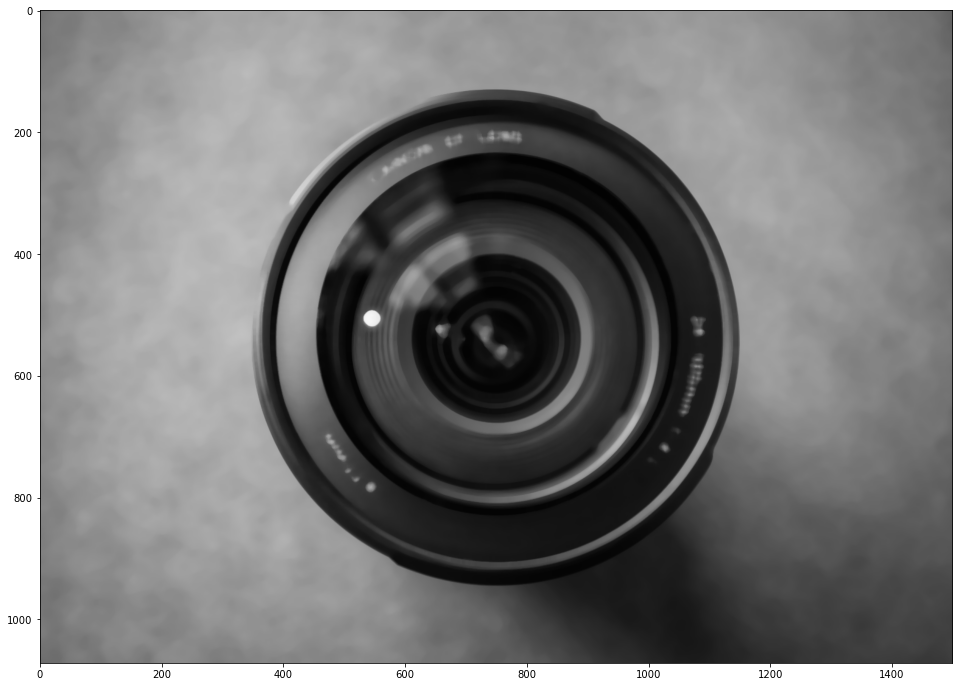

In [12]:
figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(smooth15, cv2.COLOR_BGR2RGB))

In [14]:
#retrieving the edges 
noEdge = cv2.adaptiveThreshold(smooth15, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)

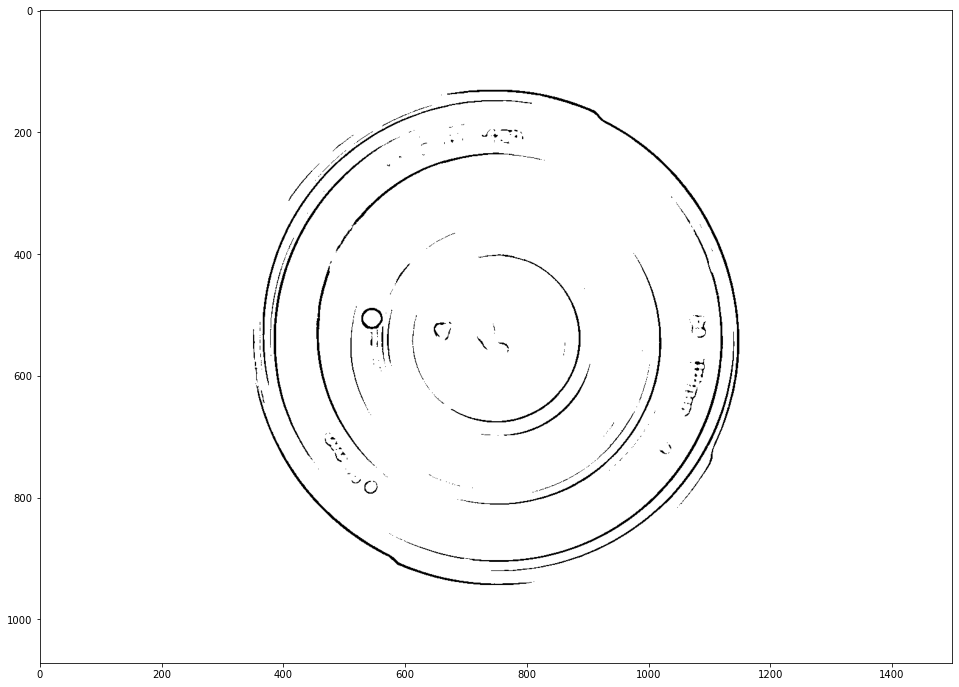

In [15]:
figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(noEdge, cv2.COLOR_BGR2RGB))

In [16]:
colorImage = cv2.bilateralFilter(img, 9, 300, 300)

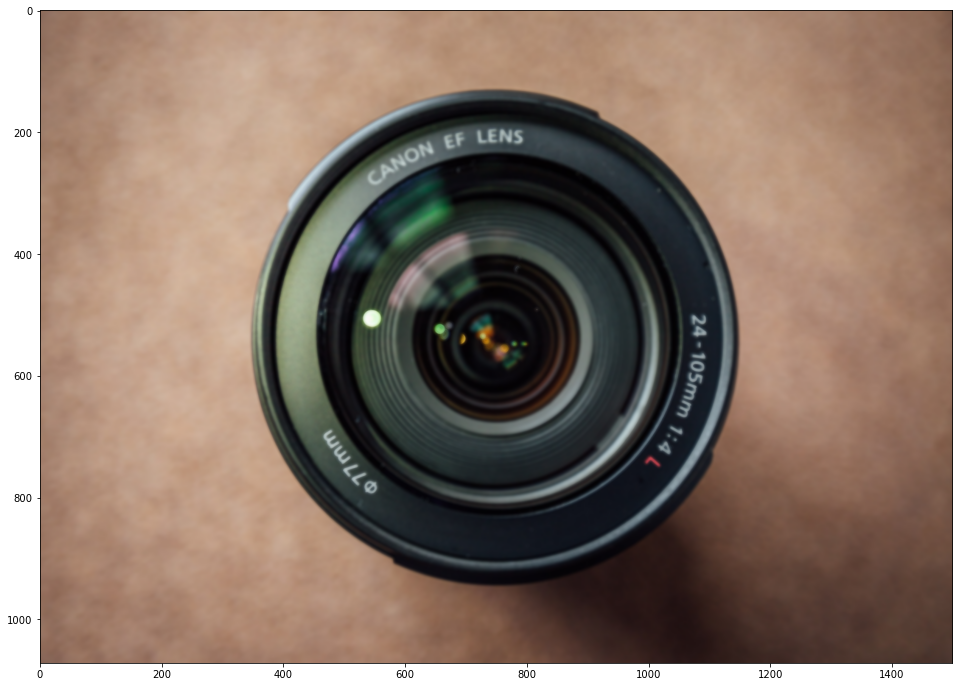

In [17]:
figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(colorImage, cv2.COLOR_BGR2RGB))

In [26]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=noEdge)

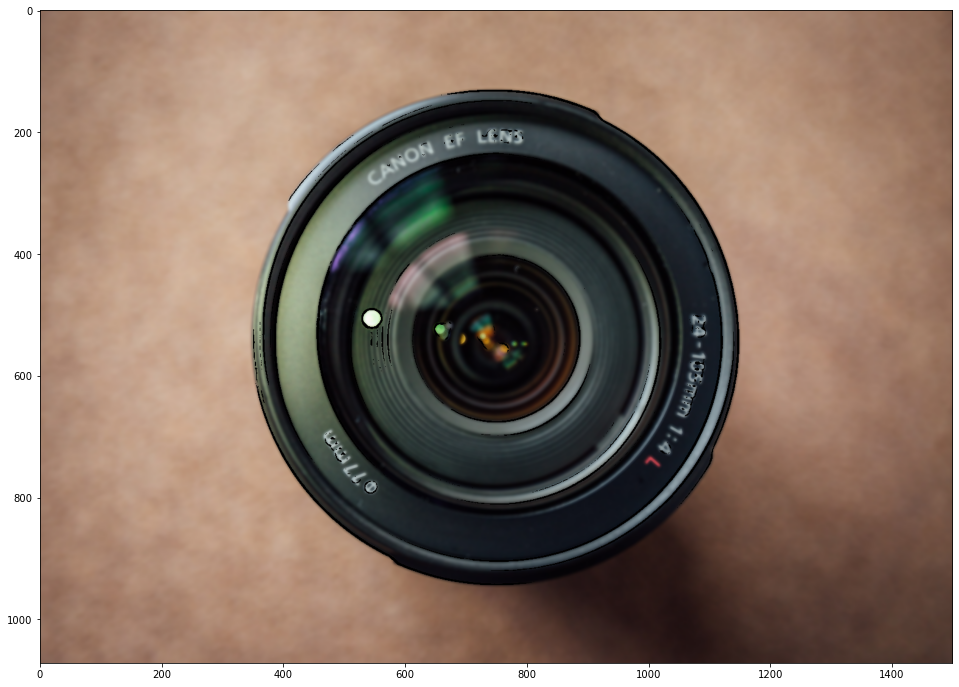

In [27]:
figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(cartoonImage, cv2.COLOR_BGR2RGB))

In [28]:
def compressed(image,k):
    rows = image.shape[0]
    cols = image.shape[1]
    #Flatten the image
    image = image.reshape(rows*cols, 3)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(image)

    #Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    #Reshape the image to original dimension
    compressed_image = compressed_image.reshape(rows, cols, 3)
    return compressed_image

In [29]:
cartoonImage = compressed(cartoonImage,16)

C:\Users\ASUS02\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


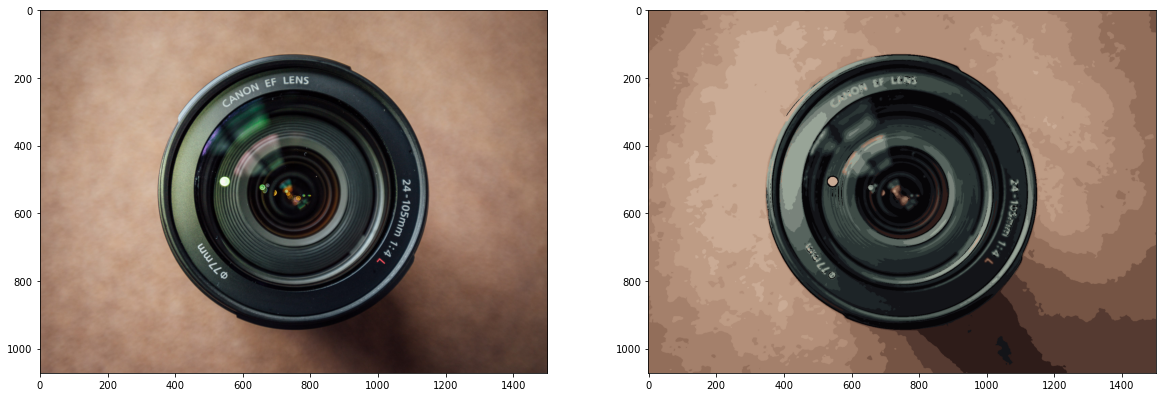

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 60))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(cartoonImage, cv2.COLOR_BGR2RGB))

# 

<a name="1"></a>
## Question 2
Gaussian noise removal parameter estimation

In [31]:
lena = cv2.imread('images/lena.tif')
caman = cv2.imread('images/caman.tif')
baboon = cv2.imread('images/baboon.bmp')

### Orginal images

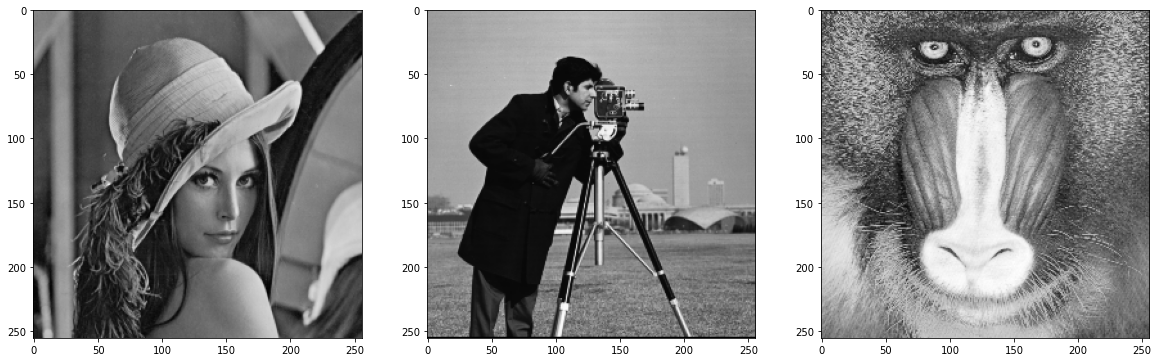

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(20, 60))
ax[0].imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(caman, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))

In [33]:
def add_gaussian_noise(image,mean, scale):
    noise = np.random.normal(mean,scale, size=image.shape)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def apply_gaussian_filter(img, ksize,sigma):
    return cv2.GaussianBlur(img, (ksize, ksize),sigma)

def apply_median_filter(img, ksize):
    return cv2.medianBlur(img, ksize)

def mse(img1, img2):
    return np.mean(np.square(img1 - img2))

In [34]:
noisy_lena = add_gaussian_noise(lena,0,20)
noisy_cameraman = add_gaussian_noise(caman,0,20)
noisy_baboon = add_gaussian_noise(baboon,0,20)

### Noise

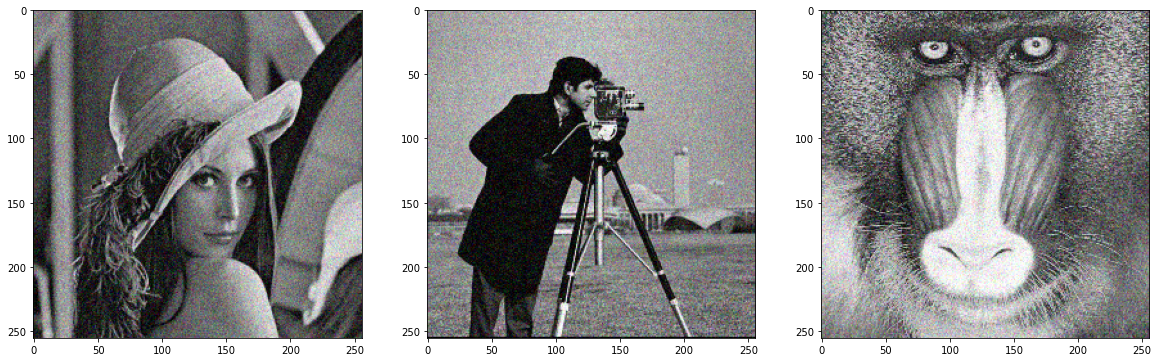

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(20, 60))
ax[0].imshow(cv2.cvtColor(noisy_lena, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(noisy_cameraman, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(noisy_baboon, cv2.COLOR_BGR2RGB))

In [36]:
print("mse lena " + str(mse(lena, noisy_lena)))
print("mse baboon " + str(mse(baboon, noisy_baboon)))
print("mse cameraman " + str(mse(caman, noisy_cameraman)))


mse lena 87.68682352701823
mse baboon 87.50758361816406
mse cameraman 87.93135070800781


### Median

In [37]:
filtered_lena = apply_median_filter(noisy_lena,5)
filtered_cameraman = apply_median_filter(noisy_cameraman,5)
filtered_baboon = apply_median_filter(noisy_baboon,5)

In [38]:
print("mse lena " + str(mse(lena, filtered_lena)))
print("mse baboon " + str(mse(baboon, filtered_baboon)))
print("mse cameraman " + str(mse(caman, filtered_cameraman)))

mse lena 51.389017740885414
mse baboon 81.19809977213542
mse cameraman 49.727457682291664


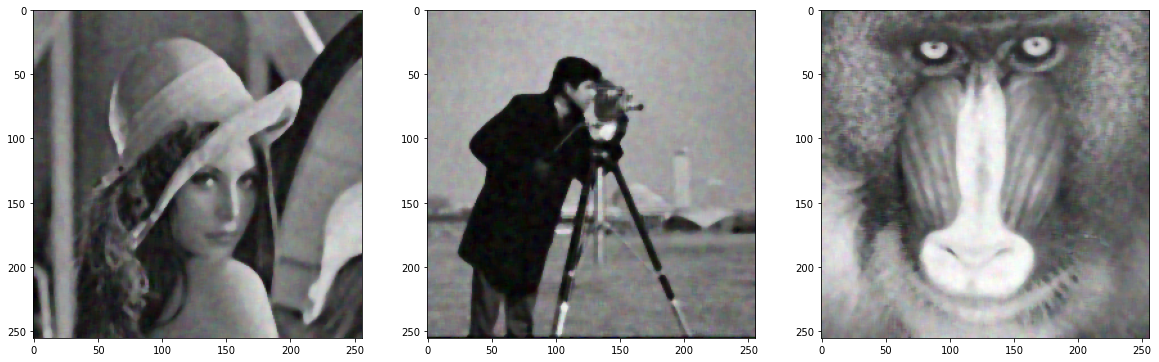

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20, 60))
ax[0].imshow(cv2.cvtColor(filtered_lena, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(filtered_cameraman, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(filtered_baboon, cv2.COLOR_BGR2RGB))

### Gaussian

In [40]:
filtered_lena = apply_gaussian_filter(noisy_lena,5,20)
filtered_cameraman = apply_gaussian_filter(noisy_cameraman,5,20)
filtered_baboon = apply_gaussian_filter(noisy_baboon,5,20)

In [41]:
print("mse lena " + str(mse(lena, filtered_lena)))
print("mse baboon " + str(mse(baboon, filtered_baboon)))
print("mse cameraman " + str(mse(caman, filtered_cameraman)))

mse lena 49.18150838216146
mse baboon 81.71515401204427
mse cameraman 48.46764628092448


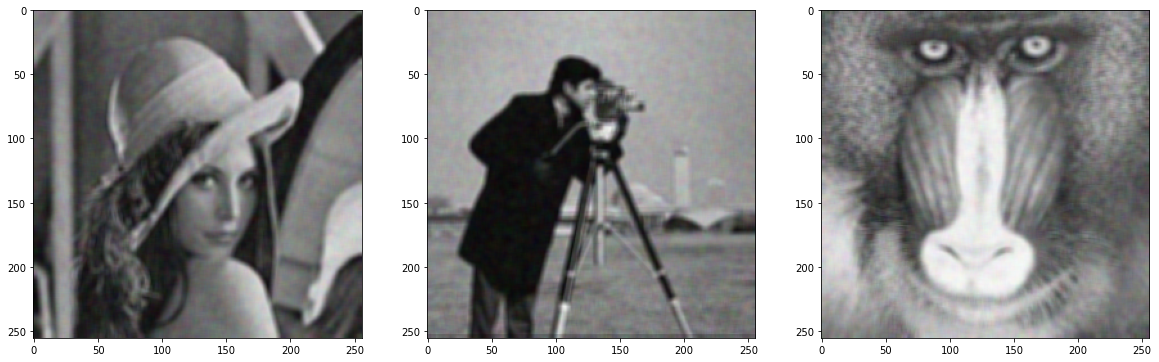

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20, 60))
ax[0].imshow(cv2.cvtColor(filtered_lena, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(filtered_cameraman, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(filtered_baboon, cv2.COLOR_BGR2RGB))

In [43]:
ksizes = range(3, 10, 2)
sigmas = np.linspace(0.1, 3, 20)

mse_values = np.zeros((len(ksizes), len(sigmas), 3))

for i, ksize in enumerate(ksizes):
    for j, sigma in enumerate(sigmas):
        filtered_lena = apply_gaussian_filter(noisy_lena, ksize=ksize, sigma=sigma)
        filtered_cameraman = apply_gaussian_filter(noisy_cameraman, ksize=ksize, sigma=sigma)
        filtered_gorilla = apply_gaussian_filter(noisy_baboon, ksize=ksize, sigma=sigma)

        mse_lena = mse(lena, filtered_lena)
        mse_cameraman = mse(caman, filtered_cameraman)
        mse_gorilla = mse(baboon, filtered_baboon)

        mse_values[i, j, 0] = mse_lena
        mse_values[i, j, 1] = mse_cameraman
        mse_values[i, j, 2] = mse_gorilla


In [44]:
best_params = []
for i in range(3):
    min_mse = np.min(mse_values[:, :, i])
    idx = np.where(mse_values[:, :, i] == min_mse)
    best_params.append((ksizes[idx[0][0]], sigmas[idx[1][0]]))
    print(f"Best params for image {i}: ksize={ksizes[idx[0][0]]}, sigma={sigmas[idx[1][0]]}")

Best params for image 0: ksize=7, sigma=1.3210526315789475
Best params for image 1: ksize=7, sigma=1.931578947368421
Best params for image 2: ksize=3, sigma=0.1


In [45]:
images = [caman, lena, baboon]
image_names = ["Cameraman", "Lena", "baboon"]

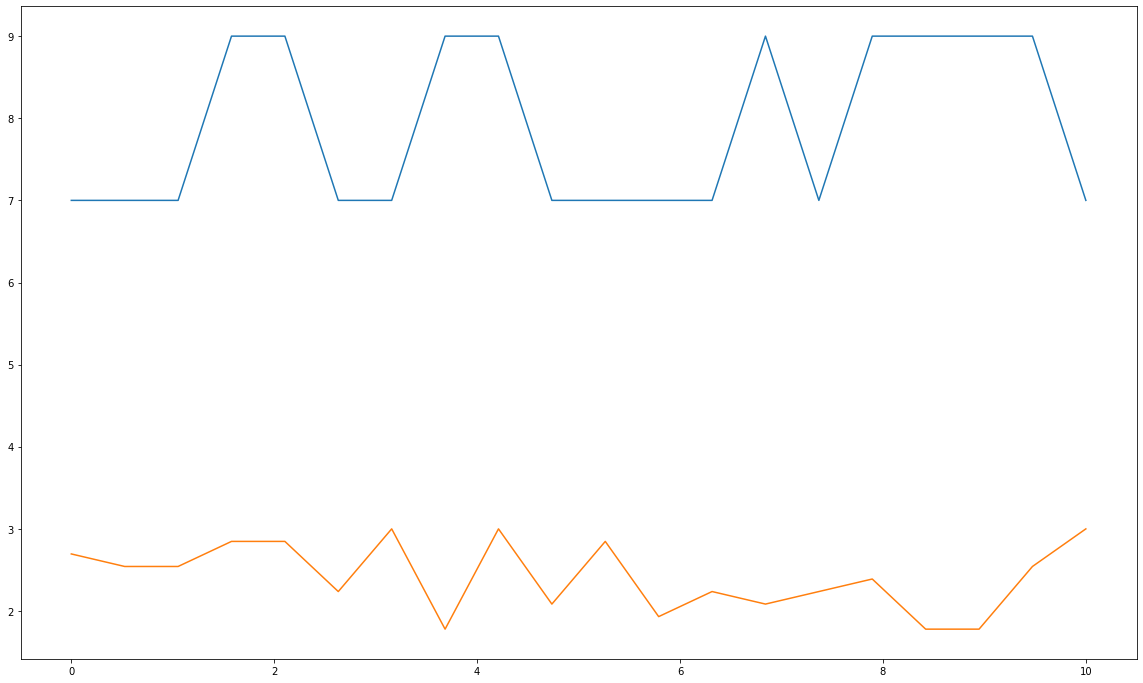

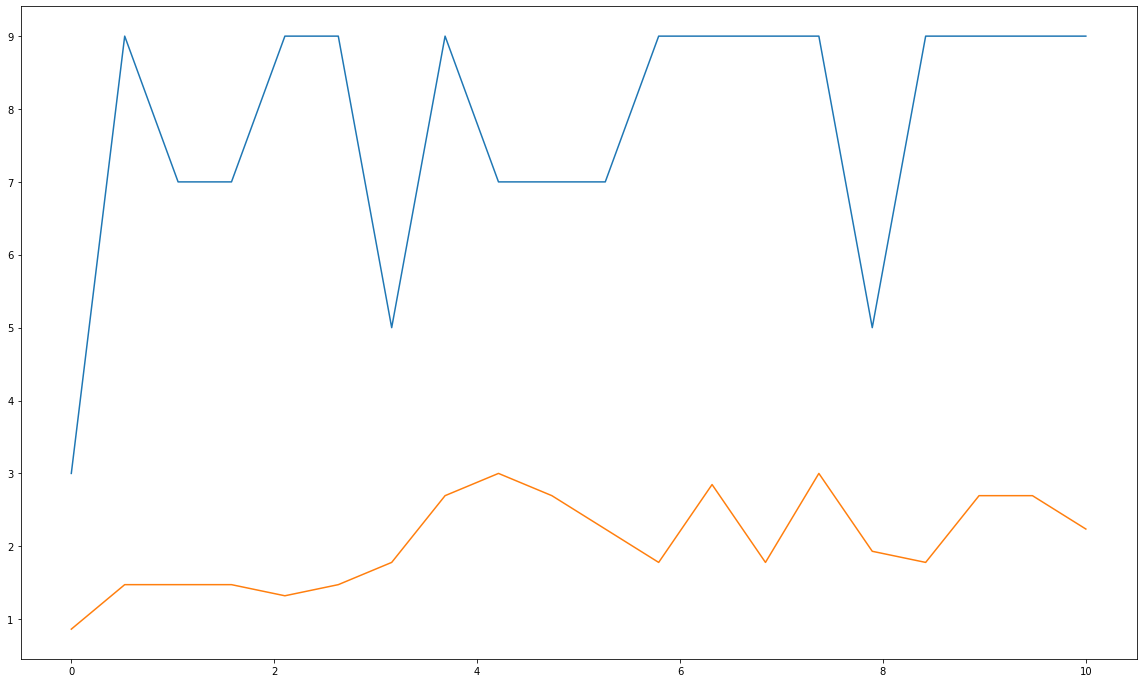

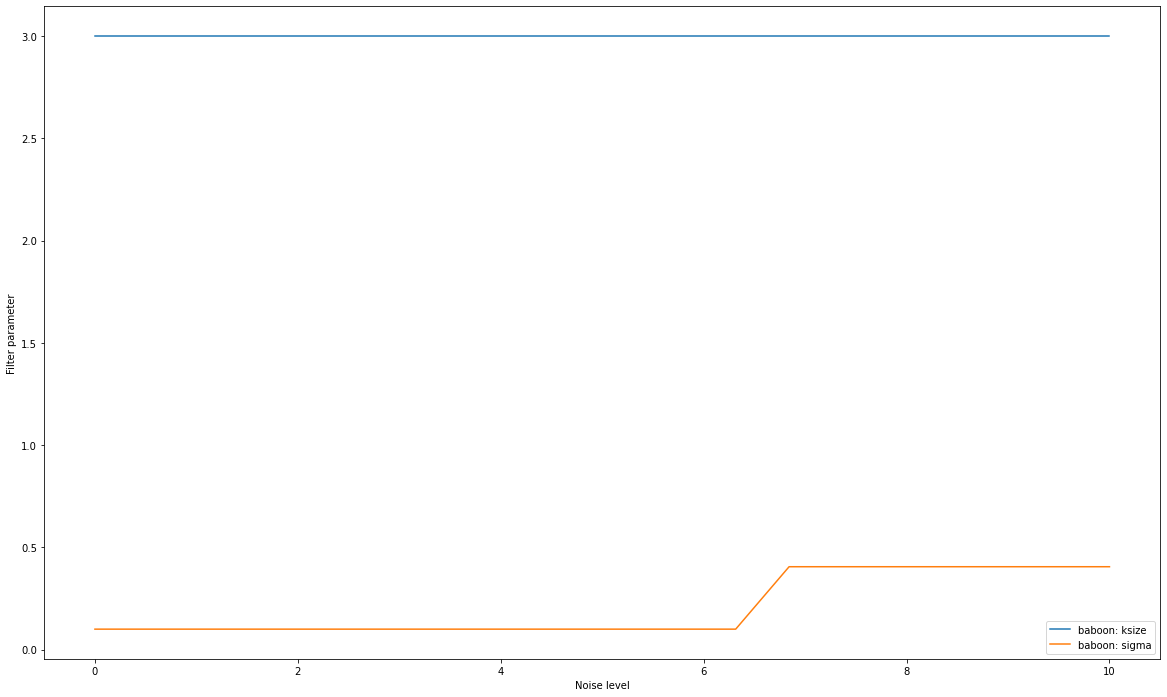

In [57]:
noise_levels = np.linspace(0, 10, 20)

for image in images:
    best_ks, best_sigmas = [], []
    for noise_level in noise_levels:
        noisy_img = add_gaussian_noise(image,5, noise_level)
        mse_values = np.zeros((len(ksizes), len(sigmas)))

        for j, ksize in enumerate(ksizes):
            for l, sigma in enumerate(sigmas):
                filtered_img = apply_gaussian_filter(noisy_img, ksize=ksize, sigma=sigma)
                mse_values[j, l] = mse(images[i], filtered_img)

        idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
        best_ks.append(ksizes[idx[0]])
        best_sigmas.append(sigmas[idx[1]])


    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    plt.plot(noise_levels, best_ks, label=f"{image_names[i]}: ksize")
    plt.plot(noise_levels, best_sigmas, label=f"{image_names[i]}: sigma")
    
plt.legend()
plt.xlabel("Noise level")
plt.ylabel("Filter parameter")
plt.show()


In [76]:
def calculate_psnr(original_image, noisy_image):
    MSE = mse(original_image, noisy_image)
    psnr = 10 * np.log10((255**2) / MSE)
    return psnr

In [77]:
ksizes = range(3, 10, 2)
sigmas = np.linspace(0.1, 3, 20)

psnr = np.zeros((len(ksizes), len(sigmas), 3))

for i, ksize in enumerate(ksizes):
    for j, sigma in enumerate(sigmas):
        filtered_lena = apply_gaussian_filter(noisy_lena, ksize=ksize, sigma=sigma)
        filtered_cameraman = apply_gaussian_filter(noisy_cameraman, ksize=ksize, sigma=sigma)
        filtered_gorilla = apply_gaussian_filter(noisy_baboon, ksize=ksize, sigma=sigma)

        psnr_lena = calculate_psnr(lena, filtered_lena)
        psnr_cameraman = calculate_psnr(caman, filtered_cameraman)
        psnr_gorilla = calculate_psnr(baboon, filtered_baboon)

        psnr[i, j, 0] = psnr_lena
        psnr[i, j, 1] = psnr_cameraman
        psnr[i, j, 2] = psnr_gorilla

In [78]:
best_params = []
for i in range(3):
    min_psnr = np.min(psnr[:, :, i])
    idx = np.where(psnr[:, :, i] == min_psnr)
    best_params.append((ksizes[idx[0][0]], sigmas[idx[1][0]]))
    print(f"Best params for image {i}: ksize={ksizes[idx[0][0]]}, sigma={sigmas[idx[1][0]]}")

Best params for image 0: ksize=3, sigma=0.1
Best params for image 1: ksize=3, sigma=0.1
Best params for image 2: ksize=3, sigma=0.1


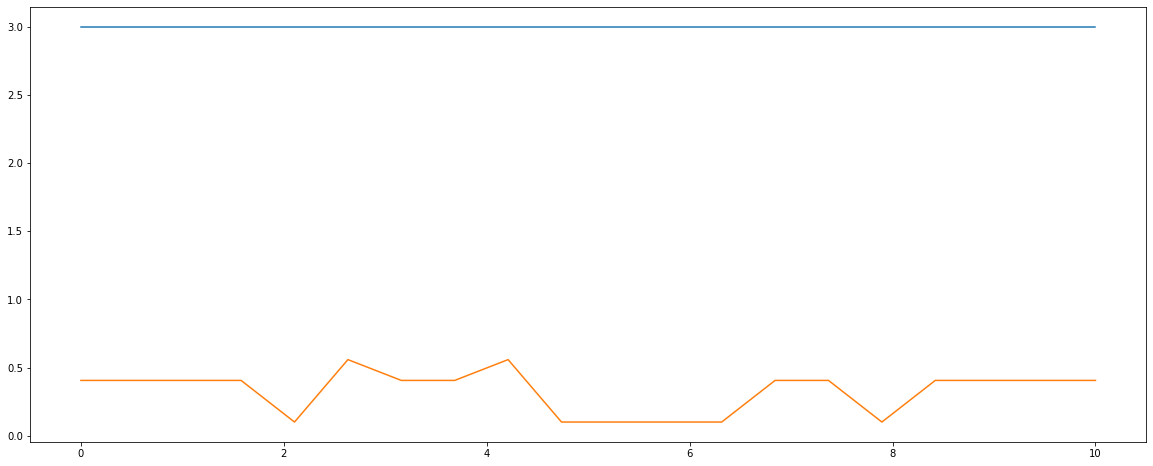

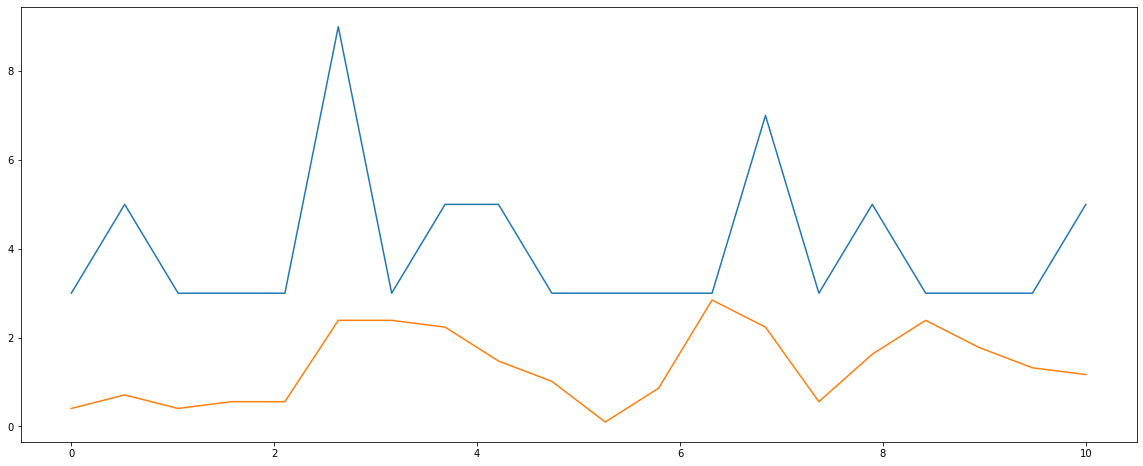

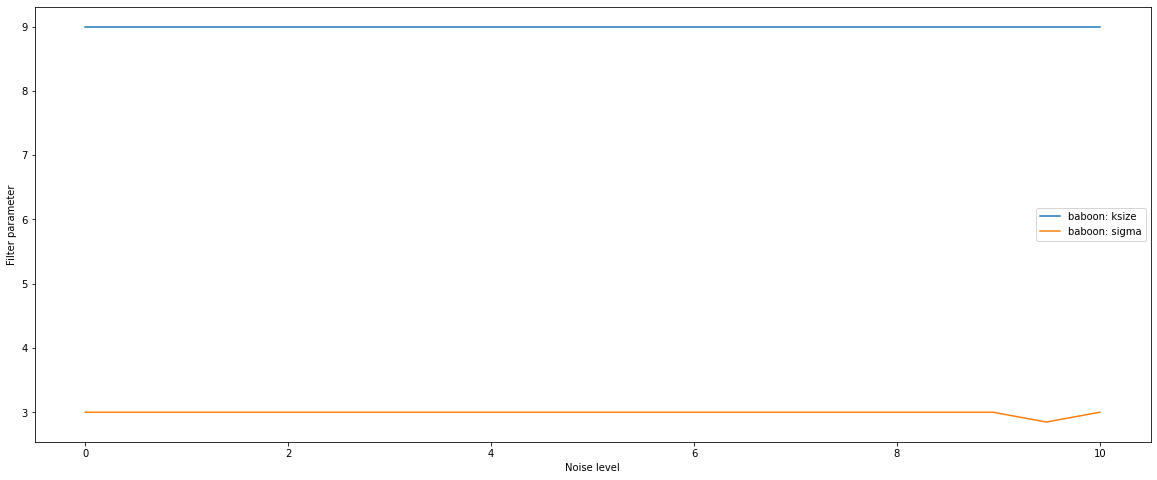

In [82]:
noise_levels = np.linspace(0, 10, 20)

for image in images:
    best_ks, best_sigmas = [], []
    for noise_level in noise_levels:
        noisy_img = add_gaussian_noise(image,5, noise_level)
        mse_values = np.zeros((len(ksizes), len(sigmas)))

        for j, ksize in enumerate(ksizes):
            for l, sigma in enumerate(sigmas):
                filtered_img = apply_gaussian_filter(noisy_img, ksize=ksize, sigma=sigma)
                mse_values[j, l] = calculate_psnr(images[i], filtered_img)

        idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
        best_ks.append(ksizes[idx[0]])
        best_sigmas.append(sigmas[idx[1]])


    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    plt.plot(noise_levels, best_ks, label=f"{image_names[i]}: ksize")
    plt.plot(noise_levels, best_sigmas, label=f"{image_names[i]}: sigma")
    
plt.legend()
plt.xlabel("Noise level")
plt.ylabel("Filter parameter")
plt.show()
